Name:Samarjeet Singh<br>3COE20

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

In [2]:
link = "https://archive.ics.uci.edu/static/public/45/data.csv"
df = pd.read_csv(link)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:
df.isnull().sum()
df = df.dropna()

In [4]:
X = df.iloc[:,0:-1]
y = df['num']

In [5]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

 10 samples with 70-30 ratio of Training and Testing Set

In [6]:
samples_list = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples_list.append((X_train, X_test, y_train, y_test))

### Fitness Function

In [7]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [8]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=100)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

### Calling the Function for Every Sample

In [9]:
for i in range(len(samples_list)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples_list[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

c:\Users\samar\anaconda3\envs\nlp\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\samar\anaconda3\envs\nlp\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\samar\anaconda3\envs\nlp\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\samar\anaconda3\envs\nlp\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\samar\anaconda3\envs\nlp\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWar

Best Accuracy =  0.56 Best Kernel =  sigmoid Best Nu =  0.22 Best Epsilon =  4.48
Best Accuracy =  0.59 Best Kernel =  linear Best Nu =  0.43 Best Epsilon =  7.51
Best Accuracy =  0.53 Best Kernel =  rbf Best Nu =  6.47 Best Epsilon =  0.34
Best Accuracy =  0.56 Best Kernel =  rbf Best Nu =  7.12 Best Epsilon =  6.25
Best Accuracy =  0.58 Best Kernel =  sigmoid Best Nu =  1.12 Best Epsilon =  4.61
Best Accuracy =  0.54 Best Kernel =  sigmoid Best Nu =  1.7 Best Epsilon =  4.22
Best Accuracy =  0.67 Best Kernel =  linear Best Nu =  0.04 Best Epsilon =  7.35
Best Accuracy =  0.52 Best Kernel =  linear Best Nu =  2.72 Best Epsilon =  3.01


Best Accuracy =  0.57 Best Kernel =  sigmoid Best Nu =  8.3 Best Epsilon =  8.2
Best Accuracy =  0.52 Best Kernel =  sigmoid Best Nu =  2.04 Best Epsilon =  5.33


c:\Users\samar\anaconda3\envs\nlp\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\samar\anaconda3\envs\nlp\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\samar\anaconda3\envs\nlp\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [10]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.56,sigmoid,0.22,4.48
1,2,0.59,linear,0.43,7.51
2,3,0.53,rbf,6.47,0.34
3,4,0.56,rbf,7.12,6.25
4,5,0.58,sigmoid,1.12,4.61
5,6,0.54,sigmoid,1.70,4.22
6,7,0.67,linear,0.04,7.35
7,8,0.52,linear,2.72,3.01
8,9,0.57,sigmoid,8.30,8.20
9,10,0.52,sigmoid,2.04,5.33


### Plotting of the Convergence Graph/Linear Curve

In [11]:
X_train, X_test, y_train, y_test = samples_list[result['Best Accuracy'].idxmax()]

In [12]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()],
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 100), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

c:\Users\samar\anaconda3\envs\nlp\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
10 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\samar\anaconda3\envs\nlp\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\samar\anaconda3\envs\nlp\lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\samar\anaconda3\envs\nlp\lib\site-packages\sklearn\svm\_base.py", line 199, in fit
    y = self._validate_targets(y)
  File 

In [13]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

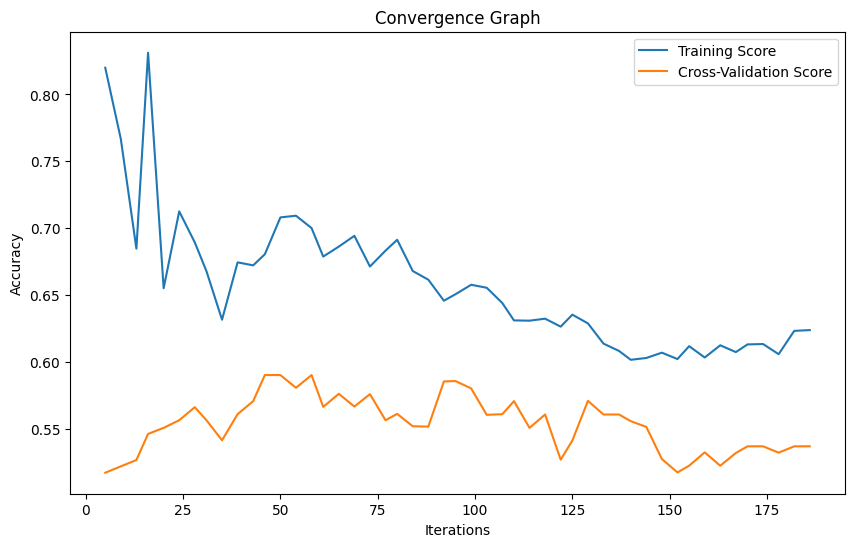

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.savefig('fig')
plt.show()